In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer as tf_idf
import scipy.sparse
import sklearn.cluster
import sklearn.decomposition
import matplotlib.pyplot as plot
from sklearn.datasets import fetch_20newsgroups
%matplotlib inline

In [5]:
data = fetch_20newsgroups(subset='all')

In [20]:
print 'Totics:',data.target_names
print 'Totics num:', len(data.target_names)
print 'Total files:', len(data.data)

Totics: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Totics num: 20
Total files: 18846


In [54]:
transformed_data = tf_idf().fit_transform(data.data)

In [55]:
print 'Sparse matrix:', transformed_data.shape

Sparse matrix: (18846, 173762)


##Кластеризация на 20 классов

In [69]:
#classes = sklearn.cluster.AgglomerativeClustering(n_clusters=len(data.target_names), affinity='euclidean').fit(transformed_data.toarray())
classes = sklearn.cluster.k_means(transformed_data, len(data.target_names))[1]

In [70]:
print classes

[17 11 19 ...,  7  7 19]


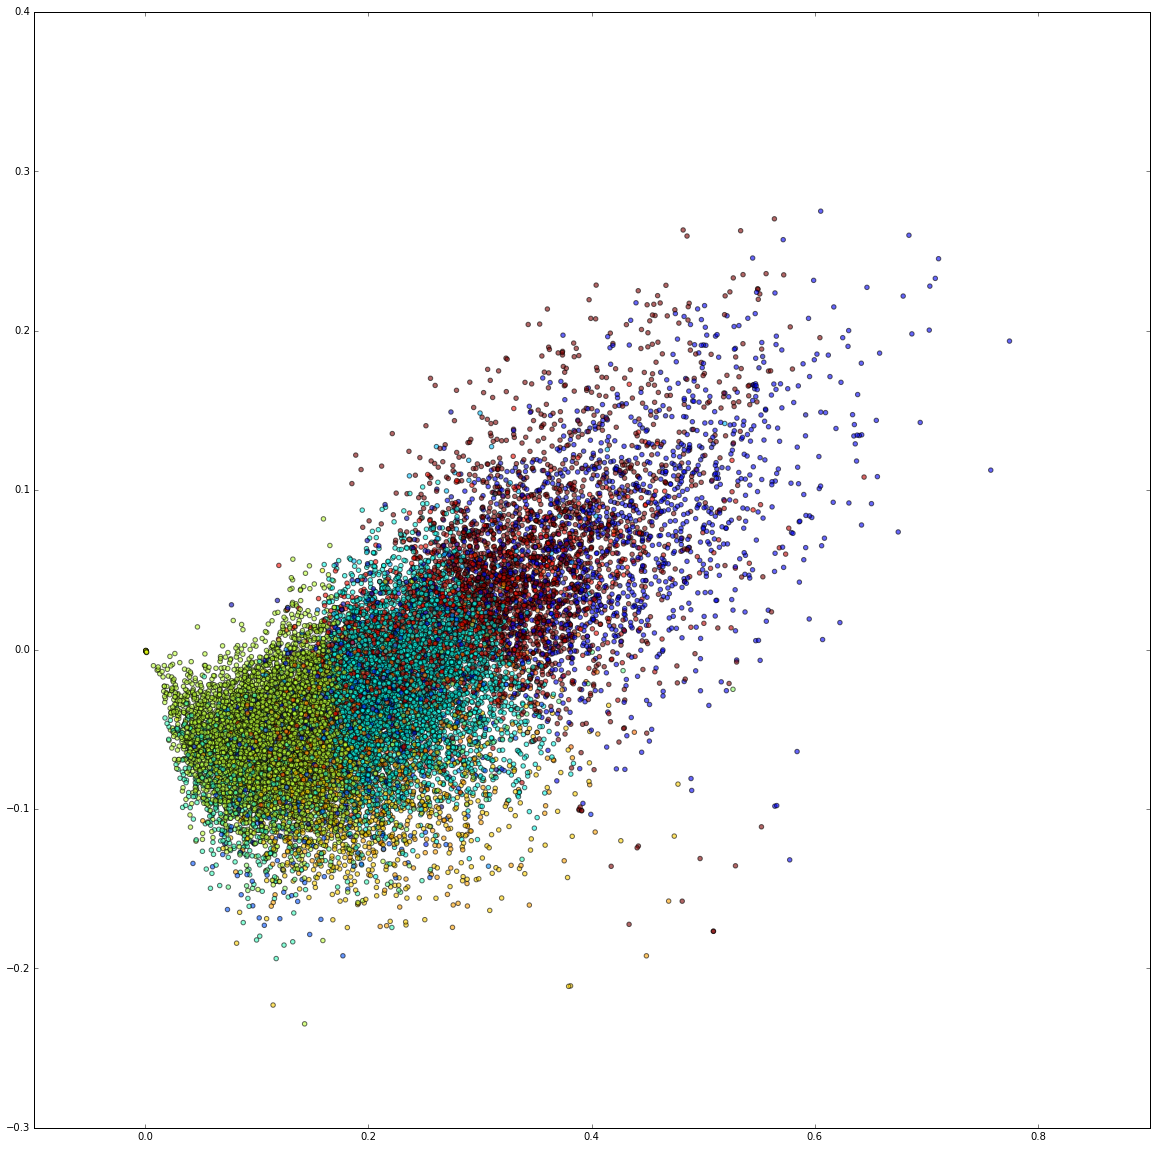

In [76]:
components = sklearn.decomposition.TruncatedSVD(2).fit_transform(transformed_data)
plot.figure(figsize = (20, 20))
plot.scatter(components[:,0], components[:,1], c=classes, alpha=0.6)
plot.show()

## Кластеризация на 2 класса

In [ ]:
classes = sklearn.cluster.k_means(transformed_data, 2)[1]

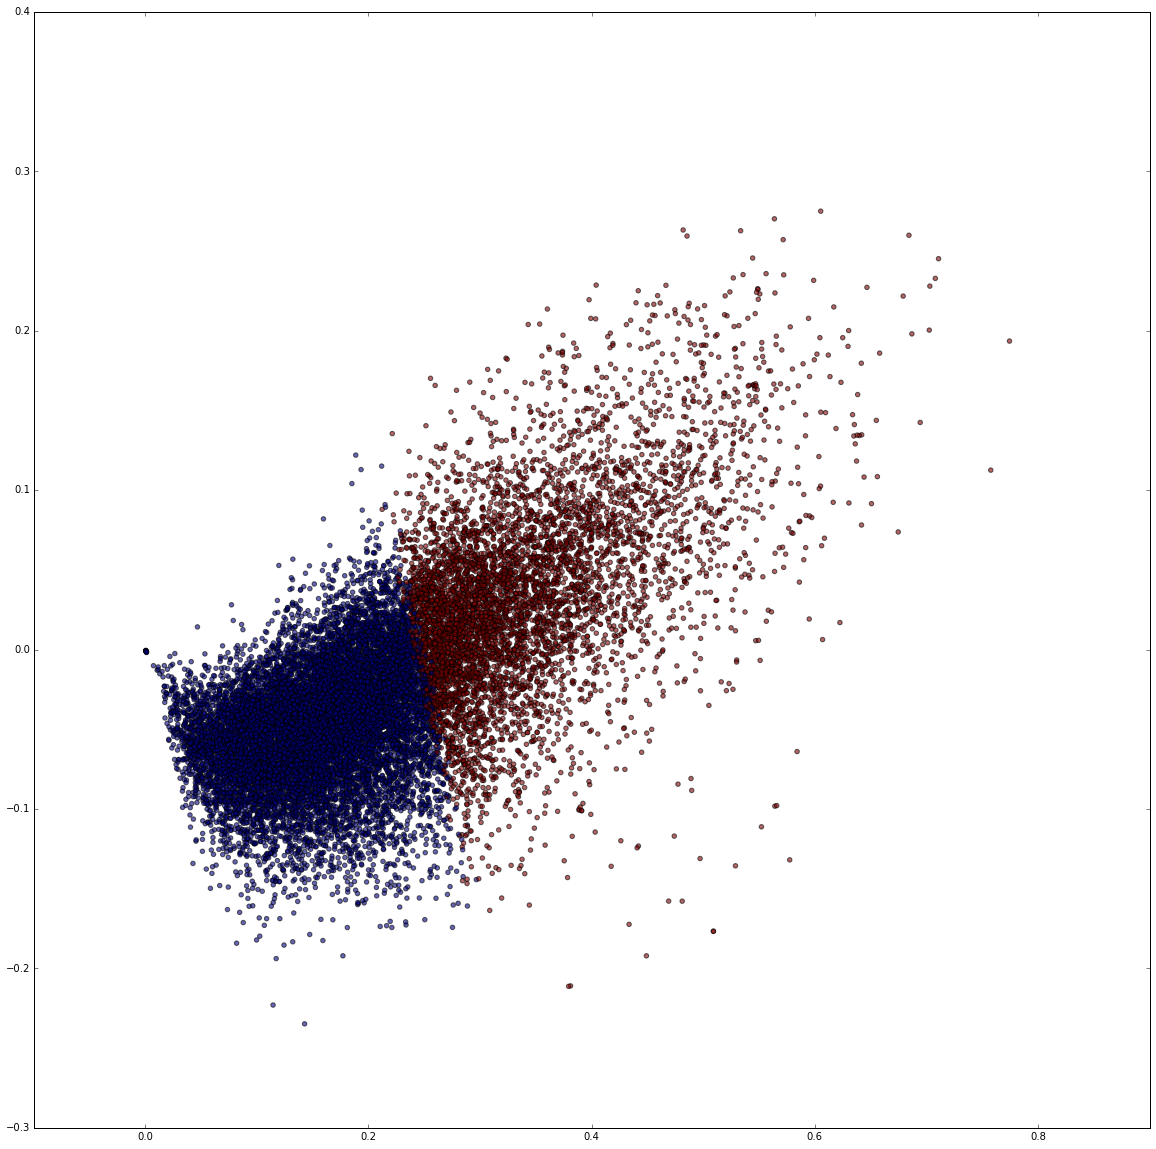

In [78]:
plot.figure(figsize = (20, 20))
plot.scatter(components[:,0], components[:,1], c=classes, alpha=0.6)
plot.show()